In [997]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  # better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [998]:
#load dataframe and remove "Unnamed" , "Customer" and "Number of Open Complaints" columns

cs_df = pd.read_csv('Data copy/Data_Marketing_Customer_Analysis_Round2.csv')
cs_df.drop(['Unnamed: 0'],axis=1, inplace=True)
cs_df.drop(['Customer'],axis=1, inplace=True)
cs_df.drop(['Number of Open Complaints'],axis=1, inplace=True)

In [999]:
#replace 0 for "Income" column with missing values

cs_df["Income"].replace(0, np.nan, inplace=True)

In [1000]:
#drop missing values and duplicates from entire dataframe

cs_df.dropna(inplace = True)

cs_df.drop_duplicates(inplace = True)

In [1001]:
#remove outliers from "Monthly Premium Auto"

Q1 = cs_df["Monthly Premium Auto"].quantile(0.25)
Q3 = cs_df["Monthly Premium Auto"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (cs_df["Monthly Premium Auto"] >= Q1 - 1.5 * IQR) & (cs_df["Monthly Premium Auto"] <= Q3 + 1.5 *IQR)
cs_df = cs_df.loc[filter]


In [1002]:
#remove outliers from "Customer Lifetime Value"

Q1 = cs_df["Customer Lifetime Value"].quantile(0.25)
Q3 = cs_df["Customer Lifetime Value"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (cs_df["Customer Lifetime Value"] >= Q1 - 1.5 * IQR) & (cs_df["Customer Lifetime Value"] <= Q3 + 1.5 *IQR)
cs_df = cs_df.loc[filter]

In [1003]:
cs_df["Customer Lifetime Value"]

2        14947.917300
10        5154.764074
13        5454.587929
16        5326.677654
18        2736.352663
             ...     
10897     9075.768214
10902     3579.023825
10903     2771.663013
10906     5259.444853
10908    11971.977650
Name: Customer Lifetime Value, Length: 2904, dtype: float64

# Activity 7

## Linear Regression

- Train-test split.
- Standardize the data (after the data split).
- Apply linear regression.
- Model Interpretation.
- Model Validation

## Model Evaluation:
- MSE.
- RMSE.
- MAE.


1. split x/y
2. x: devide categorical/numerical
- categorical: encode
- x: concatination categorical/numerical
- split data x_train/x_test
- x_train: devide categorical_x_train/numerical_x_train
- x_test: devide categorical_x_test/numerical_x_test
- x_train/x_test numericals:
- standardize x_train (x_train use fit --> then apply it for x_train and x_test)
- quantiletransformer (x_train use fit --> then apply it for x_train and x_test) -->Income, CLV,...
- x_train: concatination categorical_x_train:/numerical_x_train
- x_test: concatination categorical_x_test/numerical_x_test

## X/Y Split

In [1004]:
# X/Y Split target variable: 'Total Claim Amount'

X=cs_df.drop('Total Claim Amount', axis=1)
y=cs_df['Total Claim Amount']

## Data Split (train/test split)

In [1005]:
#train/test split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [1006]:
#reset indices for y_train and y_test

y_train =y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [1007]:
# split x_train and x_test by numerical and categorical

X_train_numerical = X_train._get_numeric_data()

X_test_numerical = X_test._get_numeric_data()

X_train_categorical = X_train.select_dtypes("object")

X_test_categorical = X_test.select_dtypes("object")

## Encoding categorical features

In [1008]:
#encode X_train_categorical

X_train_categorical=pd.get_dummies(X_train_categorical, drop_first=True)

pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_categorical).toarray(),

columns=OneHotEncoder(drop='first').fit(X_train_categorical).get_feature_names(input_features=X_train_categorical.columns)).head()

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,State_California_1,State_Nevada_1,State_Oregon_1,State_Washington_1,Response_Yes_1,Coverage_Extended_1,Coverage_Premium_1,Education_College_1,Education_Doctor_1,Education_High School or Below_1,...,Renew Offer Type_Offer3_1,Renew Offer Type_Offer4_1,Sales Channel_Branch_1,Sales Channel_Call Center_1,Sales Channel_Web_1,Vehicle Class_SUV_1,Vehicle Class_Sports Car_1,Vehicle Class_Two-Door Car_1,Vehicle Size_Medsize_1,Vehicle Size_Small_1
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1009]:
#encode X_test_categorical

X_test_categorical=pd.get_dummies(X_test_categorical, drop_first=True)

pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_categorical).toarray(),

columns=OneHotEncoder(drop='first').fit(X_test_categorical).get_feature_names(input_features=X_test_categorical.columns)).head()

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,State_California_1,State_Nevada_1,State_Oregon_1,State_Washington_1,Response_Yes_1,Coverage_Extended_1,Coverage_Premium_1,Education_College_1,Education_Doctor_1,Education_High School or Below_1,...,Renew Offer Type_Offer3_1,Renew Offer Type_Offer4_1,Sales Channel_Branch_1,Sales Channel_Call Center_1,Sales Channel_Web_1,Vehicle Class_SUV_1,Vehicle Class_Sports Car_1,Vehicle Class_Two-Door Car_1,Vehicle Size_Medsize_1,Vehicle Size_Small_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1010]:
#reset indices for x_train_categorical and x_test_categorical

X_train_categorical = X_train_categorical.reset_index(drop=True)

X_test_categorical = X_test_categorical.reset_index(drop=True)

## Standardize x_train and x_test

In [1011]:
#standardize x_train_numerical

std_scaler=StandardScaler().fit(X_train_numerical)   # finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_numerical)

In [1012]:
#standardize x_test_numerical

std_scaler=StandardScaler().fit(X_test_numerical)

X_test_scaled=std_scaler.transform(X_test_numerical)

In [1013]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.17008652e+00 -5.23604631e-01 -7.67188740e-01 -1.97554285e-01
  -1.14285719e+00 -8.40278109e-01]
 [-3.77471744e-01  1.19053192e+00 -9.93205430e-01  1.88136962e+00
   5.78681784e-01  1.20358725e+00]
 [ 2.24713938e-01  1.42111951e+00 -4.39353310e-02 -9.89525298e-01
   6.13815233e-01  3.86041104e-01]
 ...
 [ 7.71524135e-01 -9.23035981e-01  1.04094478e+00 -1.97554285e-01
  -1.21312409e+00  2.02113339e+00]
 [ 9.48071192e-01  7.99708288e-01  1.26696147e+00  4.38468203e-04
  -1.94254081e-01 -2.27319670e-02]
 [ 4.33941245e-01  1.89442001e+00  4.08098049e-01 -2.96550662e-01
  -1.07259029e+00  1.20358725e+00]]
--------
[[ 0.844563   -1.6796957   1.23668683  1.81068693  1.03124126 -0.00903325]
 [ 0.68263251  1.54984834  0.69692913  0.41561807  1.46925508 -0.00903325]
 [-1.09600704 -0.0537981  -0.74242476 -1.17874634 -0.57480942 -0.79673269]
 ...
 [-1.15844574 -0.18422033 -0.9673238  -0.18226858  0.41072168 -0.79673269]
 [-0.13040315 -1.08981375 -0.69744495 -0.18226858 -1.01282325  1.96021535]

In [1014]:
#change X_train_scaled and X_test_scaled to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_numerical.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_numerical.columns)

In [1015]:
#reset indices for x_train_scaled and x_test_scaled

X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

## Data Transformation

In [1016]:
#use Quantile Transformer on "Income","Months Since Policy Inception" and "Customer Lifetime Value"

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled["Income"].to_numpy().reshape(-1,1))
X_train_scaled["Income"] = qt.transform(X_train_scaled["Income"].to_numpy().reshape(-1,1))
X_test_scaled["Income"] = qt.transform(X_test_scaled["Income"].to_numpy().reshape(-1,1))

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled["Months Since Policy Inception"].to_numpy().reshape(-1,1))
X_train_scaled["Months Since Policy Inception"] = qt.transform(X_train_scaled["Months Since Policy Inception"].to_numpy().reshape(-1,1))
X_test_scaled["Months Since Policy Inception"] = qt.transform(X_test_scaled["Months Since Policy Inception"].to_numpy().reshape(-1,1))

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled["Customer Lifetime Value"].to_numpy().reshape(-1,1))
X_train_scaled["Customer Lifetime Value"] = qt.transform(X_train_scaled["Customer Lifetime Value"].to_numpy().reshape(-1,1))
X_test_scaled["Customer Lifetime Value"] = qt.transform(X_test_scaled["Customer Lifetime Value"].to_numpy().reshape(-1,1))

## Concatenation

In [1017]:
#concatenate X_train_scaled and X_train_categorical and X_test_scaled and X_test_categorical

X_train_con=pd.concat([X_train_scaled,X_train_categorical],axis=1)

X_test_con=pd.concat([X_test_scaled,X_test_categorical],axis=1)

# Apply Linear Regression

In [1018]:
X.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

## Modeling using Statsmodels

In [1019]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant

predictions_test = model.predict(X_test_const_scaled) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     71.08
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:48:22   Log-Likelihood:                -12072.
No. Observations:                2032   AIC:                         2.435e+04
Df Residuals:                    1929   BIC:                         2.493e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1020]:
predictions_test

0      616.134203
1      549.143730
2       61.384053
3      650.878191
4      217.833203
          ...    
867    369.678344
868    515.352385
869    369.053644
870    388.933741
871    353.620022
Length: 872, dtype: float64

In [1021]:
#display adjusted R-squared

print(model.rsquared_adj)

0.77873502163938


## Modeling using Scikit Learn
### Model fitting

In [1022]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

### model parameters ( b1,b2,b3,b4)

In [1023]:
model.coef_

array([ 6.64316535e+00, -8.15038993e+00,  9.83938310e+01,  2.84393157e-01,
       -2.84198857e+00, -2.54154433e+00, -5.98999487e+00, -9.70858537e+00,
       -6.83248135e+00, -3.39637907e+00, -7.07695849e+00, -1.21855033e+01,
       -1.35607539e+01,  9.30502383e-01,  5.81218482e+00,  1.45551758e-02,
       -7.96866210e+00, -2.47104998e+01, -1.71565474e+00, -2.73651798e+01,
       -2.88694131e+01, -1.44903276e+01, -1.78220752e+01, -8.98776036e+00,
       -1.20542249e+01, -2.54889461e+01, -1.62285415e+01,  1.06978788e+01,
       -2.29734598e+00,  1.17767146e+01, -1.61452249e+01, -4.32333207e+00,
       -1.15693058e+01,  3.42596552e+00, -1.81863570e+01,  1.61075867e+01,
       -1.33679691e+01,  1.32651337e+01,  2.05068128e+01, -2.72436788e+01,
       -1.21497800e+01,  1.51567104e+01, -1.04613725e+01,  6.40514393e+00,
       -1.81334926e+01, -2.24074708e+01, -2.77101816e+01, -3.25502635e+01,
        7.94614530e+00, -2.36519401e+01, -2.95536012e+01, -2.06557093e+01,
       -2.74442938e+01, -

In [1024]:
model.intercept_

127.86382243307088

In [1025]:
y_pred=model.predict(X_test_con)   

In [1026]:
y_test

0      552.000000
1      565.267705
2       18.918935
3      657.600000
4      264.040157
          ...    
867    321.600000
868    446.400000
869    316.800000
870    345.600000
871    467.803638
Name: Total Claim Amount, Length: 872, dtype: float64

In [1027]:
y_pred

array([616.26099221, 549.42910449,  61.67368473, 650.99185321,
       218.51522159, 582.04580096, 480.46156618, 481.12336414,
       367.54523914, 530.90856177, 124.57074759, 218.81493548,
       371.25084921, 209.24759046, 612.9715646 , 219.83462186,
       404.98046894, 177.21440336, 453.12191085, 381.99069507,
       217.19594118, 545.85473086,   4.38671894, 387.08491936,
       391.73197653,  55.3389317 , 460.07481301, 532.77386977,
       350.78084659, 387.5029383 , 264.57655008, 376.12109394,
        81.57493672, 124.7410369 , 285.05343668, 436.81977962,
       418.81640644, 434.17002613, 547.31743166, 418.85115909,
       445.84123371, 463.68720796, 526.78385469, 309.0049481 ,
        30.15306172, 256.67713746,   3.47781602, 262.81079943,
       351.8894744 , 375.9561192 , 101.13671894, 668.96734394,
       374.03587422, 565.48616855, 465.6279383 , 380.0769744 ,
       510.09825051, 154.58323345, 527.5970834 , 418.38471936,
       354.45703144, 369.12223107, 537.23567072, 504.86

In [1028]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

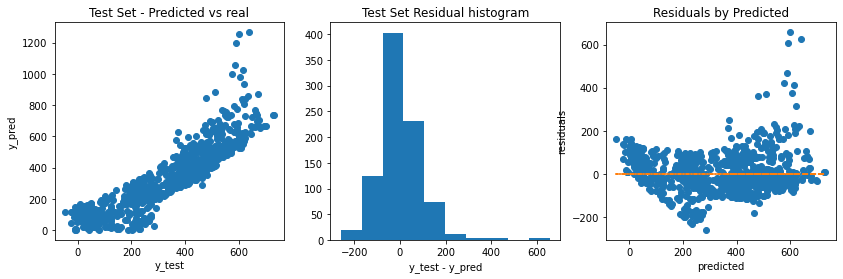

In [1029]:
# Make a scatter plot y_pred vs y_test
# What kind of plot will you get if all the all the predictions are ok? A straight line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals i.e.: y_test - y_pred  [Homoscedasticity]
# Does it resemble a normal distribution?

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("y_test - y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### Error Metrics

In [1030]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

9050.117919114602
69.9571438435554


In [1031]:
R2=r2_score(y_test,y_pred)
R2

0.77799090508519

In [1032]:
R2_test=model.score(X_test_con,y_test)
R2_train=model.score(X_train_con,y_train)

In [1033]:
model.score(X_test_con,y_test) # R2 = model.score; same result, use different methods

0.77799090508519

### getting the number of parameters

In [1034]:
X_test.shape[1] #number of parameters (number of rows in the first column?)

22

In [1035]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7722380192334517

### Feature Importance

In [1036]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [1037]:
features_importances

,Attribute,Importance
90,Policy_Special L1,1.408608e+15
91,Policy_Special L2,1.408608e+15
84,Policy Type_Special Auto,1.408608e+15
92,Policy_Special L3,1.408608e+15
87,Policy_Personal L1,5.832046e+13
...,...,...
13,Education_College,9.305024e-01
72,Effective To Date_2/7/11,4.726834e-01
98,Sales Channel_Web,3.706902e-01
3,Months Since Last Claim,2.843932e-01


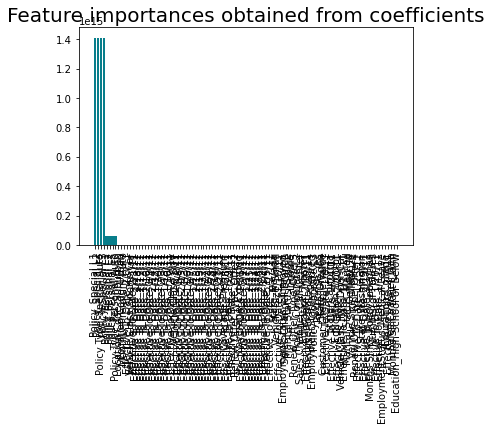

In [1038]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Evaluating predictions

In [1039]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

69.95714384355544

In [1040]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

9050.1179191146

In [1041]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

95.13210771929002